#Librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


#Cargar base de datos

In [ ]:
df= pd.read_csv('/content/base de datos.csv')

In [ ]:
df.shape # Tamaño de la base de datos

In [ ]:
df.head(5) # Visualización previa

In [ ]:
df.columns # Nombre de las variables

#1. Verificar datos nulos y tipos de datos

In [ ]:
df.info()

## Tipos de datos

*   Las variables edad, plaquetas, creatinina_suero, sodio_suero, tiempo_seguimiento y evento_muerte son variables decimales (15.5, 120.0)
*   Las variables fosfocinasa_creatinina y fraccion_eyeccion son números enterios (1, 2)
*   Las variables anemia, diabetes, presion_arterial_alta, sexo y fumador son de tipo categoricas (Si, No)





##Valores nulos

Las varuables edad, anemia, sodio_suero, sexo, tiempo_seguimiento y evento_muerte contienen datos nulos

In [ ]:
# Contar valores nulos por columna
nulos = df.isnull().sum()

# Filtrar solo las columnas que tienen nulos
nulos = nulos[nulos > 0]

# Crear gráfico de barras
plt.figure(figsize=(10,6))
nulos.plot(kind="bar")
plt.title("Valores nulos por columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de nulos")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Contar cuántas filas tienen al menos un valor nulo
filas_con_nulos = df.isnull().any(axis=1).sum()

print("Número de filas con al menos un valor nulo:", filas_con_nulos)

Teniendo en cuenta la n**aturaleza de las variables**, así como los **principios de ética e interpretabilidad**, y dado que **la cantidad de valores nulos por variable es considerablemente menor en comparación con el total de registros**, se optó por **eliminar** aquellos **registros** que presentan valores faltantes.

### Eliminación de valores nulos

In [ ]:
# Eliminar filas con valores nulos
df = df.dropna()

In [ ]:
df.info()

In [ ]:
print("Nuevo tamaño de la base de datos:", df.shape)

##Conversión de la variable edad y evento muerte

In [ ]:
df["edad"] = df["edad"].astype(int)

In [ ]:
df["evento_muerte"] = df["evento_muerte"].astype(int)

In [ ]:
df.head()

# Verificación de valores atipicos

## Estadistica descriptiva básica

In [ ]:
estadisticas = df.describe()

estadisticas

**Ejemplo con la variable edad:**

count: 291
291 pacientes tienen la edad registrada (No hay valores nulos).

**mean:** 61
La edad promedio de los pacientes es de 61 años.

**std:** 11.9
Es la desviación estándar: indica cuánto se dispersan las edades respecto al promedio.
En este caso, la mayoría de los pacientes se encuentra en un rango de ±12 años alrededor de 61 (es decir, entre ~49 y ~73 años).

**min:** 40
El paciente más joven tiene 40 años.

**max:** 95
El paciente de mayor edad tiene 95 años.

**Quartiles**

25%: 51
El 25% más joven de los pacientes tiene 51 años o menos.

50%: 60
La mediana es de 60 años, es decir, la mitad de los pacientes tiene menos de 60 y la otra mitad más de 60.

75%: 70
El 25% más longevo de los pacientes tiene 70 años o más.

**¿Qué se puede concluir?**

La base de datos refleja una población adulta mayor (la mayoría entre 50 y 70 años).

Existe una amplia dispersión, ya que algunos pacientes llegan a edades avanzadas (95).

La mediana y la media son muy cercanas (60 vs 61), lo que indica que la distribución de edades es bastante simétrica, sin un sesgo fuerte hacia jóvenes o longevos.

## Boxplot

In [ ]:
# Seleccionar solo variables numéricas (float + int)
numericas = df.select_dtypes(include=["float64", "int64"])

# Graficar cada variable en un boxplot individual
for col in numericas.columns:
    plt.figure(figsize=(6,4))
    df.boxplot(column=col)
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
    plt.show()

##¿Qué hacer con los datos atipicos?

Para determinar si se deben mantener o eliminar los valores atípicos, es necesario validarlos con especialistas clínicos, ya que estos pueden deberse tanto a errores en la toma de datos como a variaciones propias del comportamiento fisiológico.

Valores clínicamente aceptados:
*   Edad: 40-95 años
*   fosfocinasa_creatinina: 23–7861 mcg/L
*   fracción de eyección: 10- 80%
*   Plaquetas: 25,100 – 850,000 /µL
*   Creatinina en suero: 0.5 – 9.4 mg/dL
*   Sodio en suero: 113 – 148 mEq/L
*   Tiempo de seguimiento: 4 – 285 días









#Codificación de variables: One- Hot Encoding vs Label Encoding

Las técnicas de codificación permiten transformar variables categóricas en representaciones numéricas para que puedan ser utilizadas en los modelos computacionales. El método Label Encoding asigna un valor numérico único a cada categoría dentro de la variable, manteniendo la misma columna sin generar nuevas. Por otro lado, One-Hot Encoding crea una nueva columna para cada categoría, utilizando valores binarios (0 y 1) para indicar la presencia o ausencia de la misma. La elección entre ambas depende de la naturaleza de los datos, el tipo de modelo a emplear y el equilibrio entre interpretabilidad y complejidad computacional.

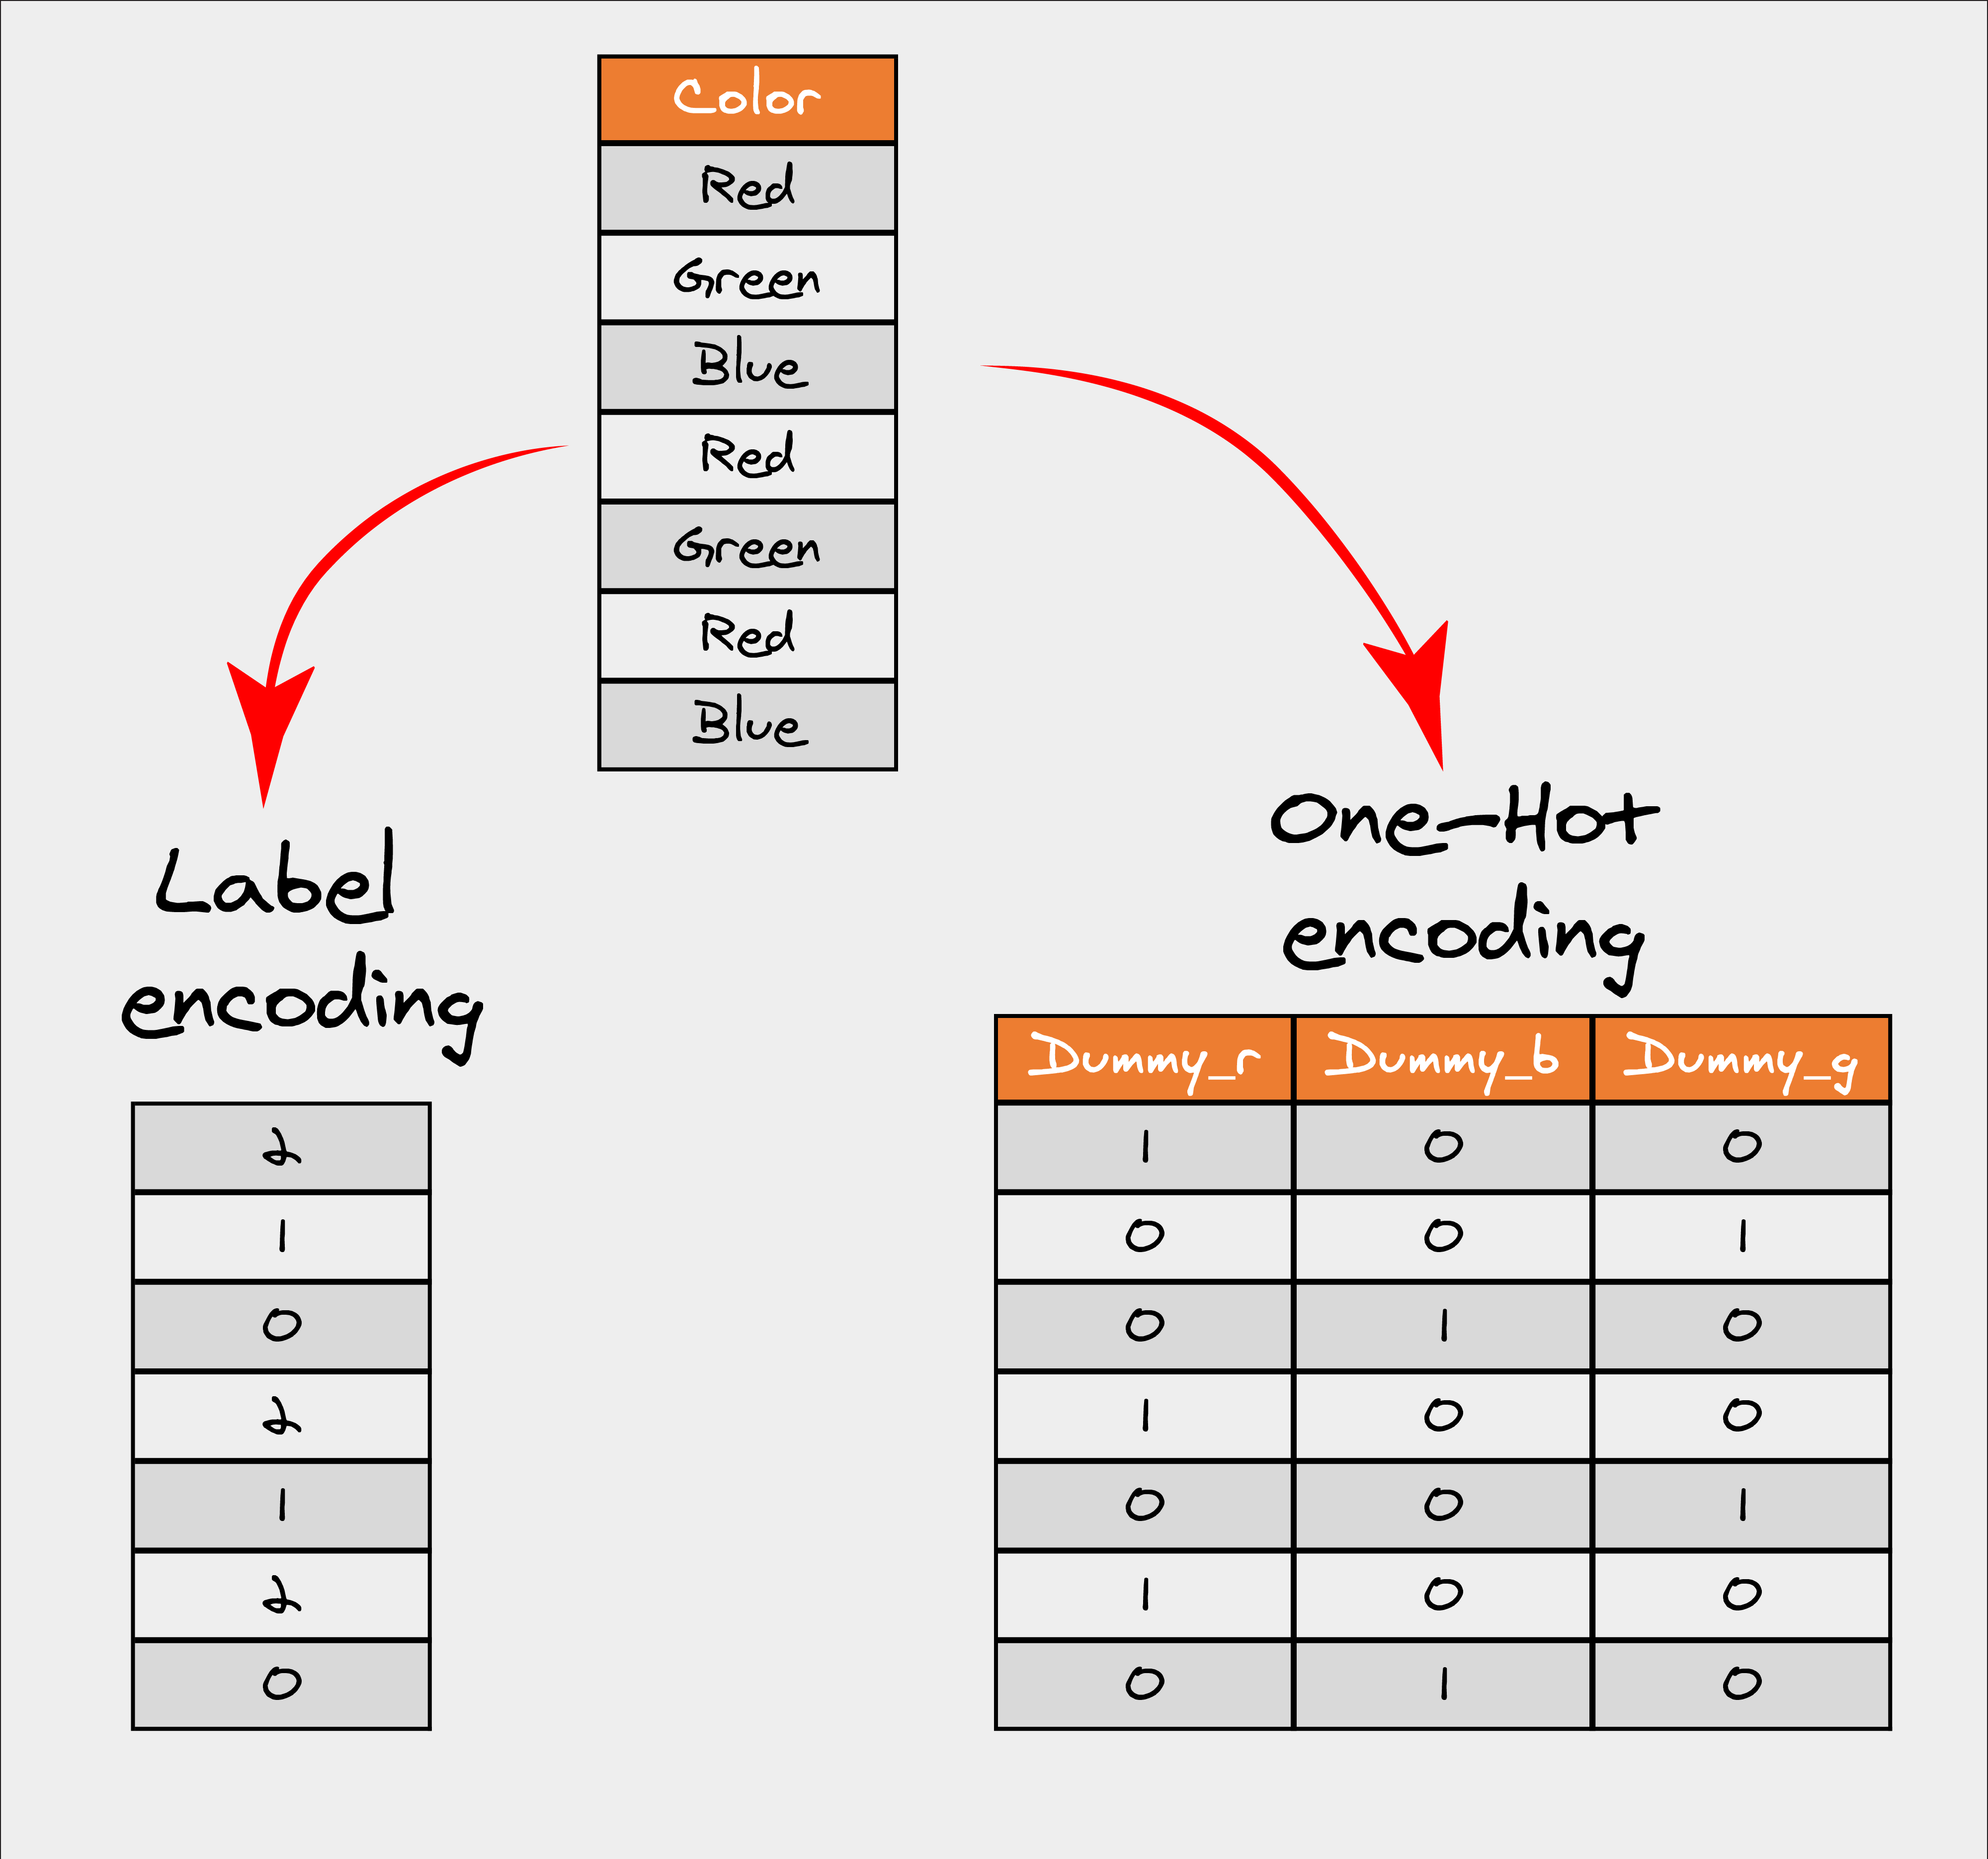

**Se opta por aplicar Label Encoding**, ya que permite transformar las variables categóricas en valores numéricos sin generar nuevas columnas, a diferencia del One-Hot Encoding. Esta técnica resulta adecuada cuando se busca **mantener la estructura compacta del conjunto de datos**, **evitando un incremento en la dimensionalidad** que podría dificultar el análisis y el desempeño del modelo, especialmente en bases con un número reducido de observaciones como la presente

##Verificación de variables categoricas

In [ ]:
# Seleccionar solo las variables categóricas
categoricas = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Variables categóricas:", categoricas)

## Conversión de variables categoricas

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Diccionario para guardar las conversiones
conversiones = {}

# Aplicar Label Encoding a cada variable categórica
for col in categoricas:
    print(f"\nVariable: {col}")
    print("Value counts antes de codificar:")
    print(df[col].value_counts(dropna=False))  # muestra también si hay nulos

    # Inicializar el codificador
    le = LabelEncoder()

    # Ajustar y transformar
    df[col] = le.fit_transform(df[col].astype(str))  # convertir a str por si hay nulos

    # Guardar el diccionario de conversión
    conversiones[col] = dict(zip(le.classes_, le.transform(le.classes_)))

    print("\nDiccionario de conversión:", conversiones[col])

    print("Value counts después de codificar:")
    print(df[col].value_counts(dropna=False))

# Mostrar todos los diccionarios
print("\n===== Diccionario final de todas las variables =====")
for var, mapping in conversiones.items():
    print(f"{var}: {mapping}")

In [ ]:
df.head() #Verificación del dataset

# Análisis gráfico

## 1. Distribución de la edad y su relación con la mortalidad: Analizar cómo se comporta la edad en la población estudiada y si existe una tendencia clara en los desenlaces según grupos etarios.

¿Qué gráficos usar?



*   Histograma de edad (población total):
Para ver la forma general (asimetrías, picos, colas) y ubicar media/mediana.


*   Boxplot de edad por desenlace (evento_muerte 0/1):
Para comparar si los que fallecen tienden a ser mayores (mediana más alta, caja desplazada, outliers).

*   Barras de tasa de mortalidad por grupos etarios:
Es el más interpretable para decisión clínica: muestra la proporción de fallecidos dentro de cada grupo de edad (p. ej. ≤50, 51–60, 61–70, ≥71).

### Histograma de edad

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Histograma de edad con curva de densidad
plt.figure(figsize=(7,4))
sns.histplot(df["edad"], bins=20, kde=True, color="skyblue", edgecolor="black")

# Agregar líneas de media y mediana
plt.axvline(df["edad"].mean(), color="red", linestyle="--", label=f"Media: {df['edad'].mean():.1f}")
plt.axvline(df["edad"].median(), color="green", linestyle=":", label=f"Mediana: {df['edad'].median():.1f}")

# Títulos y etiquetas
plt.title("Distribución de la edad en la población total")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()


### Barras de edad por desenlace

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cuartiles y etiquetas
cuartiles = df["edad"].quantile([0.25, 0.5, 0.75])
labels = [f"≤{cuartiles[0.25]:.0f}",
          f"{cuartiles[0.25]:.0f}–{cuartiles[0.50]:.0f}",
          f"{cuartiles[0.50]:.0f}–{cuartiles[0.75]:.0f}",
          f"≥{cuartiles[0.75]:.0f}"]

# Serie temporal con nombre
grupo_edad_q = pd.qcut(df["edad"], q=4, labels=labels)
grupo_edad_q.name = "grupo_edad_q"

# Resumen
resumen = (df.groupby(grupo_edad_q)["evento_muerte"]
             .agg(tasa_mortalidad="mean", n="count")
             .reset_index())

# Plot
plt.figure(figsize=(7,4))
ax = sns.barplot(data=resumen, x="grupo_edad_q", y="tasa_mortalidad",
                 color="skyblue", edgecolor="black")
ax.set_title("Tasa de mortalidad por grupos etarios (cuartiles de edad)")
ax.set_xlabel("Grupo de edad (cuartiles)")
ax.set_ylabel("Proporción de mortalidad")
for p, fila in zip(ax.patches, resumen.itertuples()):
    y = p.get_height()
    ax.annotate(f"{y:.2f}\n(n={fila.n})",
                (p.get_x() + p.get_width()/2, y),
                ha="center", va="bottom", fontsize=9)
plt.ylim(0, max(resumen["tasa_mortalidad"]) + 0.1)
plt.tight_layout(); plt.show()



###Barras de tasa de mortalidad por grupos etarios

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.violinplot(data=df, x="evento_muerte", y="edad", palette="Set2", inner="box")
ax.set_title("Distribución de la edad por desenlace de mortalidad")
ax.set_xlabel("Mortalidad (0 = No, 1 = Sí)")
ax.set_ylabel("Edad")
plt.tight_layout()
plt.show()

## 2. Distribución de variables clínicas frente al indicador de mortalidad: Comparar gráficamente variables continuas entre pacientes fallecidos y no fallecidos

¿Qué gráfico usar?

Violinplot (con box interno)

Permite comparar la distribución completa de cada variable continua entre fallecidos (1) y no fallecidos (0).

Muestra la forma (asimetría, dispersión, outliers) y al mismo tiempo la mediana y cuartiles (si usamos inner="box").

Es más informativo que un simple boxplot, porque se ve cómo se reparte la densidad de los datos.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_continuas = [
    "fosfocinasa_creatinina",
    "fraccion_eyeccion",
    "plaquetas",
    "creatinina_suero",
    "sodio_suero",
    "tiempo_seguimiento"
]

# Un gráfico por variable
for var in variables_continuas:
    plt.figure(figsize=(6,4))
    ax = sns.violinplot(data=df, x="evento_muerte", y=var, palette="Set2", inner="box")
    ax.set_title(f"Distribución de {var} por mortalidad")
    ax.set_xlabel("Mortalidad (0 = No, 1 = Sí)")
    ax.set_ylabel(var)
    plt.tight_layout()
    plt.show()


**Análisis de las gráficas**

**Fosfocinasa_creatinina**

Distribución muy dispersa, con valores extremadamente altos en ambos grupos.

No parece haber una diferencia clara entre fallecidos y no fallecidos → la variable es ruidosa y probablemente poco discriminante.

**Fracción de eyección**

Se observa claramente más baja en el grupo de fallecidos.

Esto tiene relevancia clínica, pues la fracción de eyección reducida es un marcador conocido de insuficiencia cardíaca avanzada y riesgo de mortalidad.

**Plaquetas**

Ambas distribuciones son muy similares.

No se aprecia una tendencia clara, por lo que probablemente no sea una variable significativa para predecir mortalidad en este conjunto.

**Creatinina en suero**

Los pacientes fallecidos presentan niveles más altos y con mayor dispersión.

Esto sugiere que la función renal alterada está asociada con mayor riesgo de muerte, hallazgo consistente con la literatura clínica.

**Sodio en suero**

Las distribuciones son bastante parecidas, con diferencias mínimas.

**Tiempo de seguimiento**

Clarísima diferencia: los pacientes que fallecieron tienen un tiempo de seguimiento mucho más corto.

Tiene sentido, ya que fallecer interrumpe el tiempo de observación. Es útil para describir, pero no debe usarse directamente como predictor porque puede inducir sesgo.

## 3.Evaluar asociaciones entre condiciones clínicas y mortalidad: Examinar si variables categóricas como anemia, diabetes, hipertensión, tabaquismo y sexo presentan una distribución diferente según el desenlace, lo cual puede sugerir riesgo asociado.


¿Que gráficas usar?

El uso de gráficos de barras y mapas de calor resulta conveniente en este análisis porque ambos permiten comparar de manera intuitiva la proporción de mortalidad entre categorías de variables clínicas. Mientras que los gráficos de barras facilitan una lectura directa de las diferencias dentro de cada condición específica, el heatmap ofrece una visión global y comparativa de todas las variables categóricas en un solo plano, destacando rápidamente cuáles presentan mayor asociación con el desenlace.

### Grafico de barras

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="anemia", y="evento_muerte", ci=None)
plt.title("Proporción de mortalidad según anemia")
plt.ylabel("Proporción de mortalidad")
plt.xlabel("Anemia")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="diabetes", y="evento_muerte", ci=None)
plt.title("Proporción de mortalidad según diabetes")
plt.ylabel("Proporción de mortalidad")
plt.xlabel("Diabetes")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="presion_arterial_alta", y="evento_muerte", ci=None)
plt.title("Proporción de mortalidad presion arterial alta")
plt.ylabel("Proporción de mortalidad")
plt.xlabel("Presion arterial alta")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="sexo", y="evento_muerte", ci=None)
plt.title("Proporción de mortalidad por sexo")
plt.ylabel("Proporción de mortalidad")
plt.xlabel("Sexo")
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="fumador", y="evento_muerte", ci=None)
plt.title("Proporción de mortalidad por fumador")
plt.ylabel("Proporción de mortalidad")
plt.xlabel("Fumador")
plt.show()

### Heatmap

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas de interés
categoricas = ["anemia", "diabetes", "presion_arterial_alta", "fumador", "sexo"]

# Crear tabla de proporciones de mortalidad por categoría
tabla = {}
for var in categoricas:
    tasas = df.groupby(var)["evento_muerte"].mean()
    tabla[var] = tasas

# Convertir a DataFrame para heatmap
tabla_df = pd.DataFrame(tabla)

plt.figure(figsize=(8,5))
sns.heatmap(tabla_df, annot=True, cmap="Reds", fmt=".2f", cbar_kws={'label': 'Proporción de mortalidad'})
plt.title("Proporción de mortalidad por condición clínica y sexo")
plt.ylabel("Categoría")
plt.xlabel("Variable clínica")
plt.tight_layout()
plt.show()


## 4.  Relación combinada entre variables fisiológicas y mortalidad: Graficar combinaciones clave como edad vs creatinina en suero y edad vs fraccióneyección, diferenciadas por mortalidad, para identificar posibles interacciones que indiquen mayor riesgo

**¿Que gráficas usar?**

El scatter plot es apropiado en este análisis porque permite visualizar de manera simultánea la relación entre dos variables continuas y el desenlace clínico. Al diferenciar por mortalidad mediante colores o símbolos, se identifican patrones de concentración en subgrupos específicos, como pacientes de mayor edad con creatinina elevada o fracción de eyección reducida, lo que facilita detectar interacciones que podrían indicar mayor riesgo.

### Edad- Creatinina en suero vs Muerte

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Edad vs Creatinina en suero
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="edad", y="creatinina_suero",
                hue="evento_muerte", style="evento_muerte",
                palette="Set1", alpha=0.7)
plt.title("Edad vs Creatinina en suero diferenciado por mortalidad")
plt.xlabel("Edad")
plt.ylabel("Creatinina en suero")
plt.legend(title="Mortalidad (0=No, 1=Sí)")
plt.tight_layout()
plt.show()



### Edad- Fracción eyección vs Muerte

In [ ]:
# 2. Edad vs Fracción de eyección
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="edad", y="fraccion_eyeccion",
                hue="evento_muerte", style="evento_muerte",
                palette="Set1", alpha=0.7)
plt.title("Edad vs Fracción de eyección diferenciado por mortalidad")
plt.xlabel("Edad")
plt.ylabel("Fracción de eyección")
plt.legend(title="Mortalidad (0=No, 1=Sí)")
plt.tight_layout()
plt.show()

## Matriz de correlaciones

In [ ]:
# Calcular matriz de correlación
corr = df.corr(method="pearson")  # también puedes usar "spearman" si prefieres

# Graficar con seaborn
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"label": "Correlación"})
plt.title("Matriz de correlación entre variables numéricas", fontsize=14)
plt.tight_layout()
plt.show()

¿Que observamos?

**Edad y mortalidad**

Correlación positiva → A mayor edad, mayor probabilidad de fallecer.

Coherente con lo que vimos en los gráficos previos.

**Fracción de eyección y mortalidad**

Correlación negativa → Menor fracción de eyección se asocia con mayor mortalidad.

Importante clínicamente, confirma que la función cardíaca deprimida aumenta el riesgo.

**Creatinina en suero y mortalidad**

Correlación positiva → Niveles más altos de creatinina se relacionan con mayor mortalidad.

Indica que la función renal es un factor crítico.

**Tiempo de seguimiento y mortalidad**

Correlación negativa → A menor tiempo de seguimiento, mayor probabilidad de muerte.

Esto es esperable: fallecer reduce el tiempo observado, por lo que no debe usarse como predictor  (es un sesgo de supervivencia).

**Sexo y fumador**

Correlación positiva  → Puede indicar que en la base hay más fumadores en un sexo específico (probablemente hombres).

No tiene relación directa con mortalidad en esta matriz, pero muestra una asociación entre variables.

Otras variables (anemia, diabetes, sodio, plaquetas, fosfocinasa), Todas muestran correlaciones muy bajas (cercanas a 0) con mortalidad.


**Conclusión general**

**Factores con correlación significativa con mortalidad:**

Edad (+)

Fracción de eyección (–)

Creatinina en suero (+)

Tiempo de seguimiento (–, pero cuidado al interpretarlo).

Factores con baja o nula relación: anemia, diabetes, hipertensión, sodio, plaquetas.

Esto confirma que la edad avanzada, el deterioro renal y la disminución de la función cardíaca son los principales predictores de mortalidad en esta cohorte.

La matriz de correlación muestra que no existen relaciones lineales fuertes entre las variables y la mortalidad, lo que justifica la aplicación de modelos de Machine Learning. Al no estar los desenlaces dominados por un patrón lineal simple, el uso de técnicas de Inteligencia Artificial resulta pertinente para identificar interacciones no lineales y multivariadas que podrían ser relevantes en el pronóstico clínico y que quedarían ocultas bajo enfoques estadísticos tradicionales.

#Modelos computacionales

In [ ]:
df = df.drop(columns=["tiempo_seguimiento"]) #Se elimina la columna tiempo de seguimiento


In [ ]:
df['evento_muerte'].value_counts()

,count
evento_muerte,
0,197
1,94


## Balanceo de clases

### SMOTE

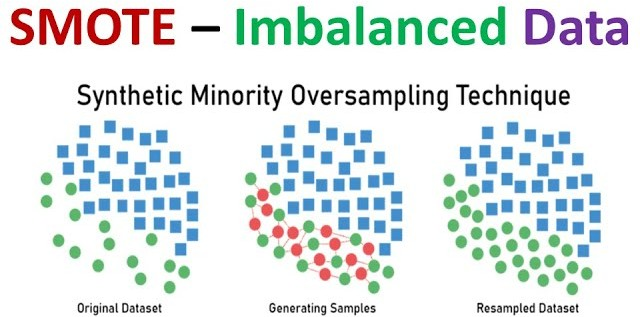

### SMOTE-TOMEK

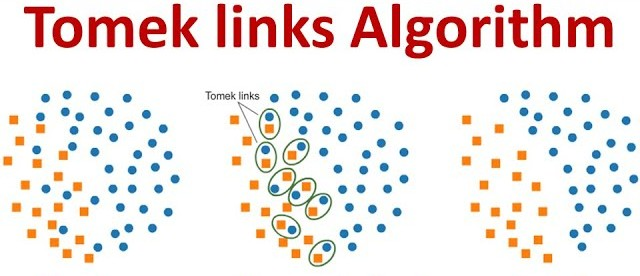

### ADASYN

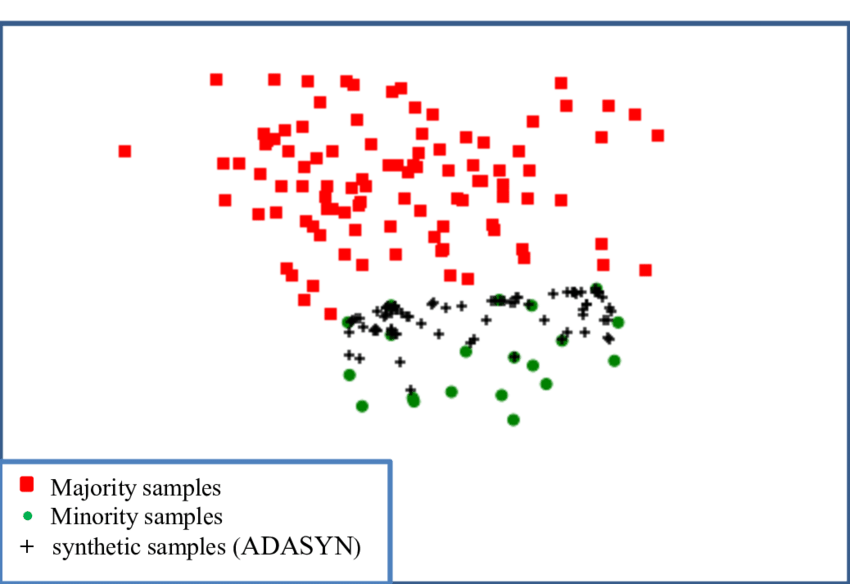

## Estandarización

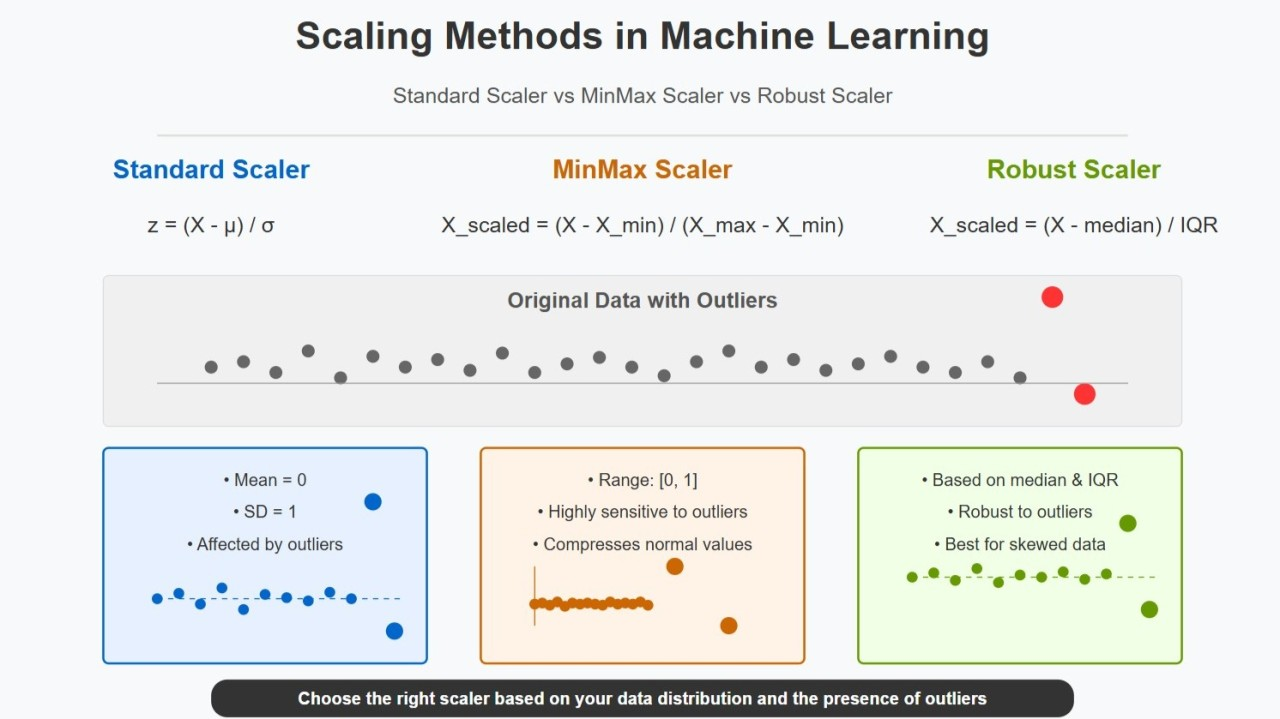

Se seleccionó Robust Scaler como técnica de estandarización debido a la presencia de valores atípicos clínicamente relevantes en el conjunto de datos. A diferencia de Standard Scaler, que se ve fuertemente afectado por la media y la desviación estándar, Robust Scaler utiliza la mediana y el rango intercuartílico (IQR), lo que reduce la influencia de los outliers sin eliminarlos ni distorsionar la escala de las demás observaciones. Esta característica permite conservar la información contenida en casos extremos, los cuales pueden tener un valor pronóstico importante, garantizando al mismo tiempo una mejor estabilidad en el proceso de modelado.

##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# ===== 1) Datos =====

X = df.drop(columns=["evento_muerte"])
y = df["evento_muerte"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===== 2) Modelos =====
modelos = {
    "DecisionTree": DecisionTreeClassifier(
        random_state=42, class_weight=None
    ),
    "RandomForest": RandomForestClassifier(
         random_state=42
    ),
    "SVM": SVC(
        kernel="rbf", probability=True, random_state=42
    ),
}



# ===== 3) Función de evaluación =====
def evaluar_modelo(nombre, modelo):
    pipe = Pipeline(steps=[
        ("smote", SMOTE(random_state=42)),
        ("scaler", RobustScaler()),
        ("model", modelo)
    ])
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]
    metrics = {
        "modelo": nombre,
        "accuracy": accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "auc": roc_auc_score(y_test, y_prob),
    }

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.tight_layout()
    plt.show()

    return metrics

# ===== 4) Ejecutar y comparar =====
resultados = []
for nombre, modelo in modelos.items():
    m = evaluar_modelo(nombre, modelo)
    resultados.append(m)

tabla = pd.DataFrame(resultados).set_index("modelo").round(3)
print(tabla)

# Visualizar comparativa
plt.figure(figsize=(7,4))
tabla[["accuracy","f1","recall","auc"]].plot(kind="bar")
plt.title("Comparativa de métricas por modelo")
plt.ylabel("Puntaje")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
